In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-konovalov-40/shared/homeworks/python_ds_miniprojects/3/user_data.csv', sep=',')

In [8]:
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-konovalov-40/shared/homeworks/python_ds_miniprojects/3/logs.csv', sep=',')

In [13]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [14]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [19]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [45]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [61]:
# Какой клиент совершил больше всего успешных операций? (success == True)

max_operations = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values(['success','client'], ascending=[False, True]) \
    .head(9)

output = max_operations.client.tolist()

output

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [29]:
# С какой платформы осуществляется наибольшее количество успешных операций?

logs.query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending=False)

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


In [78]:
# Какую платформу предпочитают премиумные клиенты?

user_data_logs = logs \
    .merge(user_data, on='client', how='left') \

In [79]:
user_data_logs.query('premium == True') \
    .groupby('platform', as_index=False) \
    .agg({'client': 'count'}) \
    .sort_values('client', ascending=False)

,platform,client
1,phone,246
0,computer,150
2,tablet,24


,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,35604,False,phone,1585459894,True,65.0
3,9961,True,phone,1585400189,NaN,NaN
4,10931,True,computer,1585468629,False,28.0
...,...,...,...,...,...,...
4495,64496,False,computer,1585459072,False,66.0
4496,73299,True,phone,1585458370,NaN,NaN
4497,8967,True,phone,1585465121,False,33.0
4498,52880,False,phone,1585455362,NaN,NaN


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


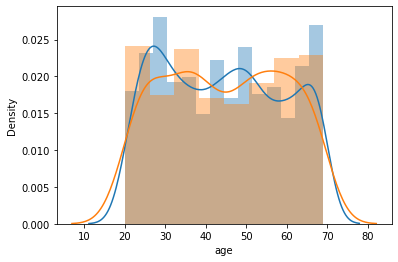

In [103]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

sns.distplot(user_data_logs.query('premium == False').age)
sns.distplot(user_data_logs.query('premium == True').age)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


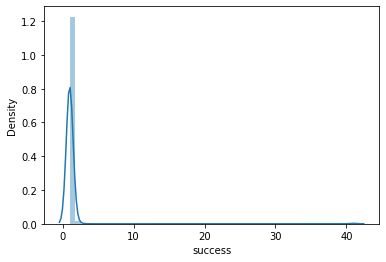

In [118]:
# Постройте график распределения числа успешных операций

success_operations = user_data_logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'sum'}) \
    .sort_values('success', ascending=False)
    
sns.distplot(success_operations.success)

In [122]:
success_operations.success.unique()

array([41, 40,  3,  2])

In [132]:
success_operations_computer = user_data_logs.query("success == True and platform == 'computer'") \
    .groupby('age', as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values('age', ascending=True)

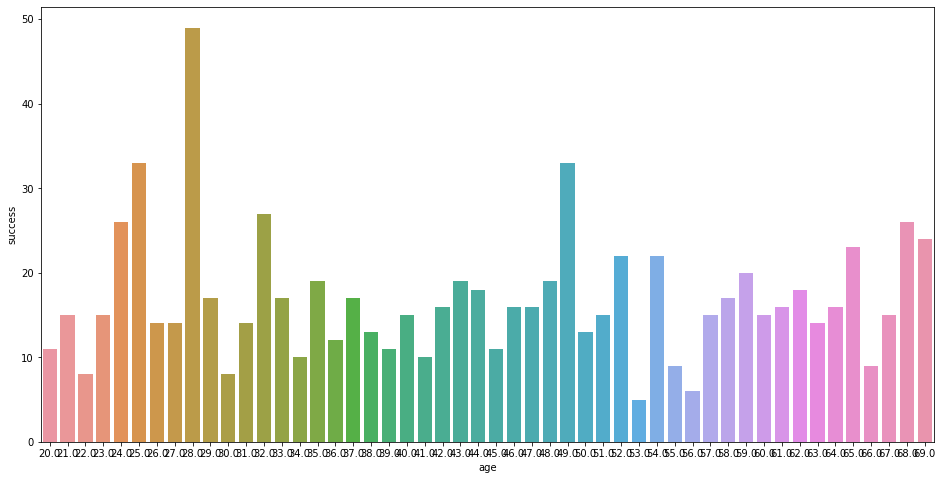

In [137]:
plt.figure(figsize=(16, 8))
sns.barplot(x=success_operations_computer.age, y=success_operations_computer.success)

In [141]:
success_operations_computer.sort_values('success', ascending=False)

,age,success
8,28.0,49
29,49.0,33
5,25.0,33
12,32.0,27
48,68.0,26
4,24.0,26
49,69.0,24
45,65.0,23
32,52.0,22
34,54.0,22
